In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

# 1. Univariate Regression

## 1.1 Sample Data

In [109]:
X = np.array([1,2,3,4])
y = np.array([2,1,4,3])

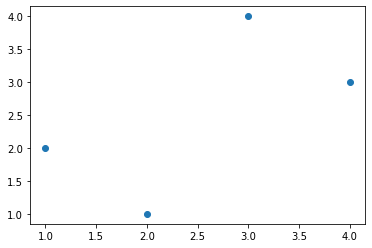

In [110]:
plt.scatter(X,y)

## 1.2 Data 변환
#### * n은 데이터의 개수를 의미한다
#### * c는 feature의 개수를 의미한다
##### 우리가 사용하는 데이터는 4개의 데이터와 1개의 feature로 이루어져있다.

In [111]:
X

array([1, 2, 3, 4])

In [112]:
X.shape

(4,)

In [113]:
data = X.reshape(-1, 1)

In [114]:
data

array([[1],
       [2],
       [3],
       [4]])

In [115]:
data.shape

(4, 1)

## 1.3 Linear Regression

#### scikii-learn 패키지의 LinearRegression을 이용해 선형 회귀 모델을 생성
#### model을 학습은 fit함수를 이용해서 할 수 있습니다.
#### model.fit(x=..., y=...)
#### x는 학습에 사용할 데이터를 y는 학습에 사용할 정답

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
model = LinearRegression()

In [118]:
model.fit(X=data, y=y) # 출력: LinearRegression(copy_X = True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [119]:
#model.fit(data, y)

## 1.3.2 모델의 식 확인

#### bias, 편향을 먼저 확인
#### sklearn에서는 intercept_로 확인

In [120]:
model.intercept_

1.0000000000000004

#### 다음은 회귀계수입니다
#### coef_로 확인할 수 있다

In [121]:
model.coef_

array([0.6])

#### 위의 두 결과로 다음과 같은 회귀선을 얻을 수 있다.
#### y = 1.0000000000000004 + 0.6 * x

## 1.3.3 예측하기
#### 이제 학습된 모델로 예측하는 방법에 대해서 알아보겠습니다.
#### 모델의 예측은 predict 함수를 통해 알 수 있습니다.

In [122]:
pred = model.predict(data)

In [123]:
pred

array([1.6, 2.2, 2.8, 3.4])

## 1.4 회귀선을 plot으로 표현하기

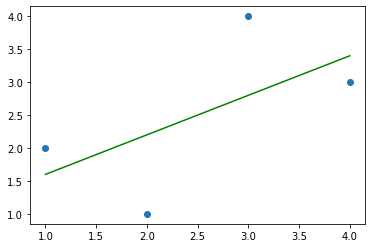

In [124]:
plt.scatter(X,y)
plt.plot(X, pred, color='green')

# 2. Multivariate Regression

## 2.1 Sample Data
#### Multivariate Regression에서 사용할 데이터를 생성하고 학습된 회귀식과 비교해 보겠습니다.

In [125]:
bias = 1
beta = np.array([2,3,4,5]).reshape(4,1)
noise = np.random.randn(100,1)

In [126]:
X = np.random.randn(100, 4)
y = bias + X.dot(beta)
y_with_noise = y + noise

In [127]:
X[:10]

array([[-0.74057432,  0.45823318,  1.2572469 , -0.44170407],
       [ 0.5413351 ,  0.5672784 , -0.43538181,  0.76681236],
       [ 0.48084856, -0.88128189, -0.68428578,  0.45401778],
       [-0.72516608, -1.43882635,  2.15079225,  0.04869812],
       [ 0.64711296, -1.07448408,  0.24474502,  0.37090588],
       [ 0.41423217,  1.19669386,  1.0824733 ,  0.27691761],
       [ 0.9303673 ,  0.33499986,  1.79409578, -0.95259799],
       [-0.56992369,  0.24691765,  0.51129208, -0.43980433],
       [ 1.79024025,  0.18092909,  0.38195648,  0.51485676],
       [ 0.59167189,  1.9003216 ,  0.60031973, -0.12461753]])

In [128]:
y[:10]

array([[ 3.71401813],
       [ 5.87703996],
       [-1.14920281],
       [ 4.0798484 ],
       [ 1.90428314],
       [11.13302717],
       [ 6.27912737],
       [ 0.44705225],
       [ 9.22537749],
       [ 9.66249986]])

## 2.2 Multivariate Regression

In [129]:
model = LinearRegression()
model.fit(X, y_with_noise)

LinearRegression()

## 2.3 회귀식 확인하기

In [130]:
model.intercept_

array([1.11417641])

In [131]:
model.coef_

array([[1.99383579, 2.94374717, 3.97346537, 4.84223742]])

#### 원래 식과 비교한 결과 편향은 잘 맞추지 못했지만 회귀 계수의 경우 비교적 정확하게 예측함

## 2.4 통계적 방법

In [132]:
bias_X = np.array([1]*len(X)).reshape(-1,1)
stat_X = np.hstack([bias_X, X])
X_X_transpose = stat_X.transpose().dot(stat_X)
X_X_transpose_inverse = np.linalg.inv(X_X_transpose)

In [133]:
stat_beta = X_X_transpose_inverse.dot(stat_X.transpose()).dot(y_with_noise)

In [134]:
stat_beta

array([[1.11417641],
       [1.99383579],
       [2.94374717],
       [3.97346537],
       [4.84223742]])

# 3. Polynomial Regression

#### 비선형 데이터를 생성해 보겠습니다.

In [135]:
bias = 1
beta = np.array([2,3]).reshape(2,1)
noise = np.random.randn(100,1)

In [136]:
X = np.random.randn(100,1)
X_poly = np.hstack((X, X**2))

In [137]:
X_poly[:10]

array([[-0.92491748,  0.85547234],
       [ 1.01010697,  1.02031609],
       [ 0.75532068,  0.57050933],
       [ 0.8542725 ,  0.7297815 ],
       [ 0.70907623,  0.5027891 ],
       [ 0.82063592,  0.67344331],
       [ 0.12924242,  0.0167036 ],
       [ 0.07362991,  0.00542136],
       [-0.25463986,  0.06484146],
       [ 0.06335837,  0.00401428]])

In [138]:
y = bias + X_poly.dot(beta)
y_with_noise = y + noise

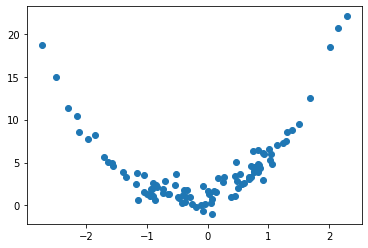

In [139]:
plt.scatter(X, y_with_noise)

## 3.2 Polynomial Regression

## 3.2.1 학습하기

In [140]:
model = LinearRegression()
model.fit(X_poly, y_with_noise)

LinearRegression()

## 3.2.2 회귀식 확인하기

In [141]:
model.intercept_

array([1.0466608])

In [143]:
model.coef_  #비교적 잘맞추는것을 확인할 수 있음

array([[2.02459592, 2.96023615]])

## 3.2.3 예측하기

In [145]:
pred = model.predict(X_poly)

## 3.3 예측값을 Plot으로 확인하기

#### * 비선형으로 예측하는 것을 확인할 수 있습니다.

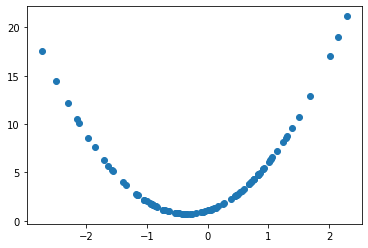

In [147]:
plt.scatter(X,pred)